- Author: Benjamin Du
- Date: 2023-09-05 16:25:47
- Modified: 2023-09-13 22:52:32
- Title: Convert PDF to Image Using Python
- Slug: convert-pdf-to-image-using-fitz-in-python
- Category: Computer Science
- Tags: Computer Science, programming, Python, PDF, convert, image, fitz

**Things on this page are fragmentary and immature notes/thoughts of the author. Please read with your own judgement!**

## Using pdfplumber

In [1]:
import pdfplumber

In [2]:
!wget www.legendu.net/media/wolfram/sum_and_product.pdf

--2023-09-17 15:06:24--  http://www.legendu.net/media/wolfram/sum_and_product.pdf
Resolving www.legendu.net (www.legendu.net)... 185.199.109.153, 185.199.110.153, 185.199.111.153, ...
Connecting to www.legendu.net (www.legendu.net)|185.199.109.153|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 140210 (137K) [application/pdf]
Saving to: ‘sum_and_product.pdf’

sum_and_product.pdf 100%[===================>] 136.92K  --.-KB/s    in 0.03s   

2023-09-17 15:06:24 (4.81 MB/s) - ‘sum_and_product.pdf’ saved [140210/140210]



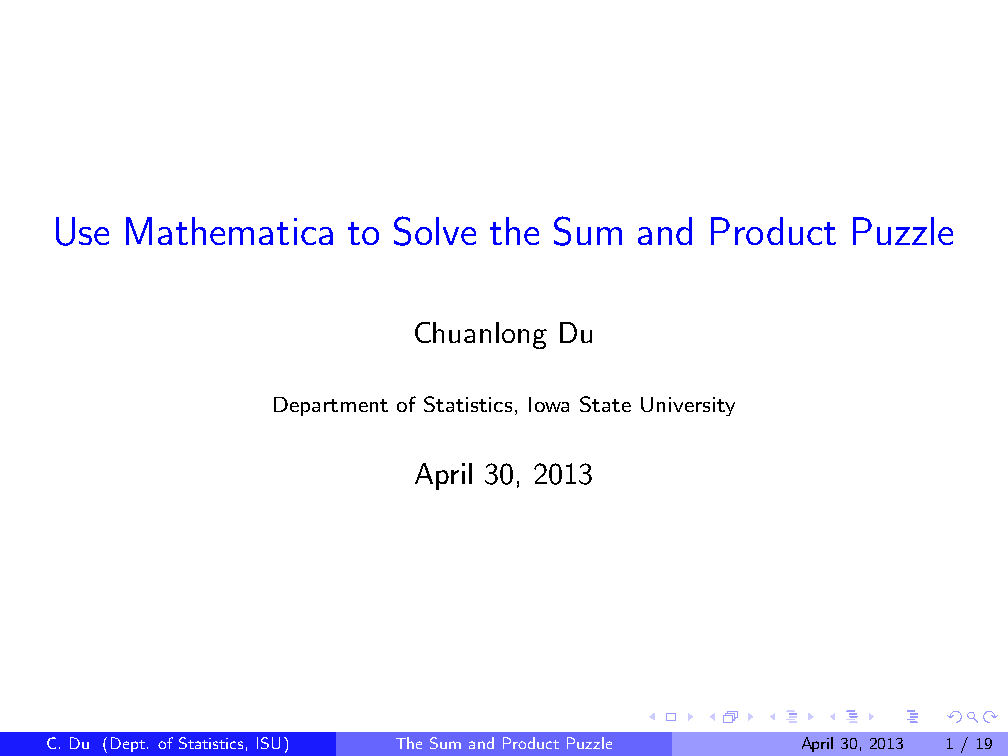

In [13]:
with pdfplumber.open("sum_and_product.pdf") as pdf:
    img = pdf.pages[0].to_image(resolution=200)
img

In [14]:
type(img)

pdfplumber.display.PageImage

In [15]:
img.save("0.png")

## Using PyMuPDF / fitz

In [ ]:
!wajig install python3-fitz

In [6]:
import fitz

In [10]:
pdffile = "source.pdf"

In [11]:
doc = fitz.open(pdffile)

In [12]:
zoom = 4
mat = fitz.Matrix(zoom, zoom)
count = 0
# Count variable is to get the number of pages in the pdf
for p in doc:
    count += 1
for i in range(count):
    val = f"my_image_{i+1}.png"
    page = doc.load_page(i)
    pix = page.get_pixmap()
    pix.save(val)
doc.close()